# Property price prediction 

#### Import Libraries


In [1]:
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import numpy as np


## 1. Problem Statement: 

The problem statement is to predict the sale price of a house, given the features of the house. The features are the columns in the dataset, and the target variable is the Sale_Price column. The problem is a linear regression problem, as the target variable is continuous.

## 2. Get Data/ load data

In [2]:
ppt=pd.read_csv(r"Property_Price_Train.csv")

## 3. Data preprocessing

In [3]:
ppt.shape

(1459, 81)

In [4]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [5]:
ppt.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
ppt.describe()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,...,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,...,93.015667,47.811902,24.580227,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,...,124.796682,67.467586,61.353507,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,...,9.656026,1.843186,-16.807302,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,...,92.803628,46.837919,25.026953,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,...,180.335986,96.523486,66.237591,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,572.298709,255.362547,225.762714,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
ppt.isnull().sum()

Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 81, dtype: int64

There are some null values present in our data so we need to replace the null values.

we will replace numerical data null values with mean and categorical data null values with mode



In [8]:
len(ppt.isnull().sum()[ppt.isnull().sum()>0])

19

In [9]:
ppt.isnull().sum()[ppt.isnull().sum()*100/ppt.shape[0]>40]

Lane_Type                1368
Brick_Veneer_Type         871
Fireplace_Quality         689
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [10]:
ppt.Lot_Extent.value_counts()

Lot_Extent
60.0     143
70.0      70
80.0      69
50.0      57
75.0      52
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [11]:
ppt.Lot_Extent=ppt.Lot_Extent.fillna(ppt.Lot_Extent.mean())

In [12]:
ppt.Basement_Height.value_counts()

Basement_Height
TA    648
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [13]:
ppt.Brick_Veneer_Type = ppt.Brick_Veneer_Type.fillna('None')

ppt.Brick_Veneer_Area = ppt.Brick_Veneer_Area.fillna(ppt.Brick_Veneer_Area.mean())

ppt.Basement_Height = ppt.Basement_Height.fillna('TA')

ppt.Basement_Condition  = ppt.Basement_Condition.fillna('TA')

ppt.Exposure_Level  = ppt.Exposure_Level.fillna('No')

ppt.BsmtFinType1  = ppt.BsmtFinType1.fillna('Unf')

ppt.BsmtFinType2  = ppt.BsmtFinType2.fillna('Unf')

ppt.Electrical_System  = ppt.Electrical_System.fillna('Sbrkr')

ppt.Garage   = ppt.Garage .fillna('Attchd')

ppt.Garage_Built_Year  = ppt.Garage_Built_Year.fillna(ppt.Garage_Built_Year.mean())

ppt.Garage_Finish_Year  = ppt.Garage_Finish_Year.fillna('Unf')

ppt.Garage_Quality  = ppt.Garage_Quality.fillna('TA')

ppt.Garage_Condition  = ppt.Garage_Condition.fillna('TA')

In [14]:
ppt.isnull().sum()

Id                0
Building_Class    0
Zoning_Class      0
Lot_Extent        0
Lot_Size          0
                 ..
Month_Sold        0
Year_Sold         0
Sale_Type         0
Sale_Condition    0
Sale_Price        0
Length: 81, dtype: int64

 Drop the colum which are having more null values

In [15]:
ppt=ppt.drop(['Pool_Quality', 'Fence_Quality','Miscellaneous_Feature', 'Fireplace_Quality', 'Lane_Type'], axis=1)

In [16]:
ppt.shape

(1459, 76)

In [17]:
len(ppt.isnull().sum()[ppt.isnull().sum()>0])

0

In [18]:
#to drop unique columns(i.e. id column)
ppt=ppt.iloc[:, 1::]

In [19]:
ppt.shape

(1459, 75)

In [20]:
ppt.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,GS,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,GS,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,GS,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000


## Data visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


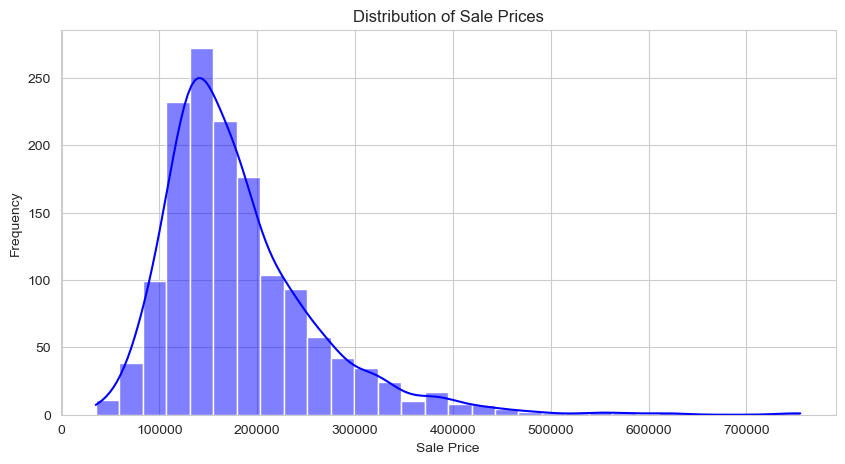

In [22]:
#Distribution of Sale Prices¶
#Understanding how the sale prices are distributed can help identify skewness and outliers.
sns.set_style("whitegrid")

plt.figure(figsize=(10,5))
sns.histplot(ppt['Sale_Price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

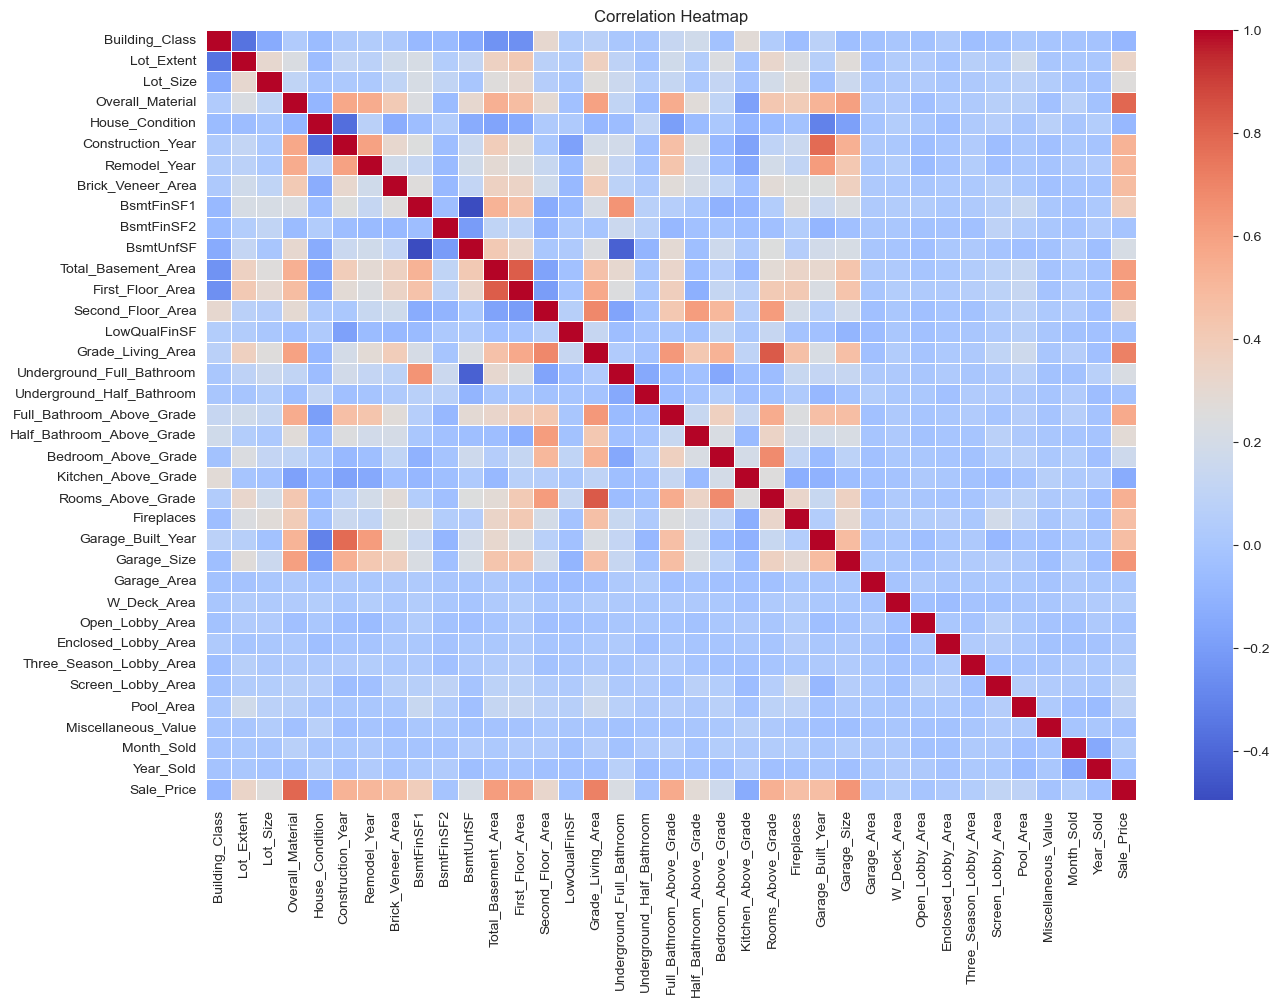

In [23]:
#. Correlation Heatmap¶
#A heatmap of correlations between numerical features and the sale price to identify which variables are most related to the price

# Correlation matrix of numerical features
corr_matrix = ppt.select_dtypes(include=['int64', 'float64']).corr()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

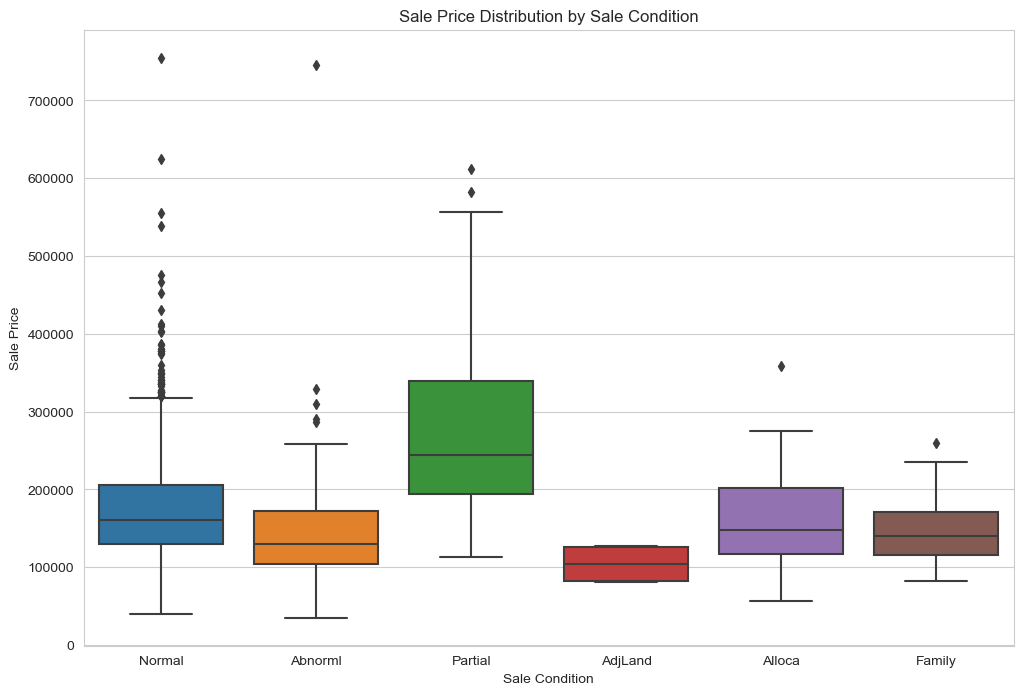

In [24]:
#Boxplot of Sale Prices by Sale Condition
#This can show the relationship between the overall quality of a house and its sale price.

plt.figure(figsize=(12, 8))
sns.boxplot(x='Sale_Condition', y='Sale_Price', data=ppt)
plt.title('Sale Price Distribution by Sale Condition')
plt.xlabel('Sale Condition')
plt.ylabel('Sale Price')
plt.show()


#label encoder : to convert object datatypes to numeric


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
ppt[ppt.select_dtypes(include=['object']).columns]=ppt[ppt.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [28]:
ppt.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,...,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,21.788818,0,0,0,0,12,2008,8,4,250000


In [29]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   int32  
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   int32  
 5   Property_Shape             1459 non-null   int32  
 6   Land_Outline               1459 non-null   int32  
 7   Utility_Type               1459 non-null   int32  
 8   Lot_Configuration          1459 non-null   int32  
 9   Property_Slope             1459 non-null   int32  
 10  Neighborhood               1459 non-null   int32  
 11  Condition1                 1459 non-null   int32  
 12  Condition2                 1459 non-null   int32  
 13  House_Type                 1459 non-null   int32

## 4. Sampling: 

Divide data into train and test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#ppt=df1     #part of outlier

In [32]:
ppt_train, ppt_test= train_test_split(ppt, test_size=0.25)

In [33]:
ppt_train_x=ppt_train.iloc[:, 0:-1]
ppt_train_y=ppt_train.iloc[:, -1]

In [34]:
ppt_test_x=ppt_test.iloc[:, 0:-1]
ppt_test_y=ppt_test.iloc[:, -1]

## 5. Model Building:

we are buildind a linear regression model in this project

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linereg=LinearRegression()

In [37]:
linereg.fit(ppt_train_x, ppt_train_y)

LinearRegression()

#### Prediction

In [38]:
pred_train= linereg.predict(ppt_train_x)
pred_test= linereg.predict(ppt_test_x)

In [39]:
err_test=ppt_test_y - pred_test
err_test

917     15336.982387
434      7322.011939
667    -28396.258506
980    -62812.766206
341      7704.065481
            ...     
810    -10941.611877
345     -4621.080142
1312      897.560671
1153   -15961.296784
943     21906.294591
Name: Sale_Price, Length: 365, dtype: float64

## Model Evaluation:

Evaluation parameters in Linear Regression model are: 
    
a)Rsquare

b)Adjusted Rsquare

c)MSE(Mean Square Error)

d)RMSE(Root Mean Square Error)

e)MAPE(Mean Absolute Percentage Error)


In [40]:
Rsquare=linereg.score(ppt_train_x, ppt_train_y)
Rsquare

0.8527274791434837

In [41]:
#n no of records
N=ppt_train_x.shape[0]

In [42]:
#no of x variable (or no of col)
K=ppt_train_x.shape[1]

In [43]:
adj_Rsquare=1-(1-Rsquare)*(N-1)/(N-K-1)
adj_Rsquare

0.8420325168830497

In [44]:
mse=np.mean(np.square(err_test))
mse

957750850.3372692

In [45]:
rmse=np.sqrt(mse)
rmse

30947.549989252286

In [46]:
mape=np.mean(np.abs(err_test*100/ppt_test_y))
mape

11.781537312032546

### Conclusion:


According the evaluating parameters we get to know that our model is good.

Higher the Rsquare better the model 
and lower the MAPE better the model.

In [47]:
#.coef_ gives values of beta1, beta2, beta_n
linereg.coef_  

array([-1.12241897e+02, -1.21547320e+03, -1.07570639e+02,  1.38149852e-01,
        1.71762537e+04, -1.39005186e+03,  4.95749729e+03, -4.20507095e+04,
       -2.02518722e+02,  8.02782333e+03,  3.07877974e+02, -1.53088364e+03,
       -1.76951647e+04, -2.55735168e+03, -1.72242625e+03,  1.18210971e+04,
        5.55110178e+03,  1.71768616e+02,  7.26330202e+01,  1.46851914e+03,
        3.55737326e+04, -7.14123882e+02,  2.47107124e+02,  3.37151347e+03,
        3.11253670e+01, -8.50541875e+03,  9.00493992e+02,  3.03487575e+03,
       -9.19500269e+03,  1.83069935e+03, -3.52374803e+03, -9.84611172e+02,
        4.13565574e+00,  1.41684904e+03,  1.55382145e+01, -7.68573579e+00,
        1.19881344e+01, -2.44147925e+03, -1.07931360e+03, -1.39548862e+03,
       -5.94610477e+02,  1.89395126e+01,  2.17108601e+01, -1.60365556e+01,
        2.46138172e+01,  5.60304057e+03, -1.14302501e+03,  2.05419010e+03,
       -2.51326427e+02, -2.75056052e+03, -7.84834675e+03, -7.47830650e+03,
        2.61248906e+03,  

In [48]:
#.intercept_ gives value of beta0
linereg.intercept_

1542449.8104489427

In [49]:
# lets check assumptions
#on train data

In [50]:
err_train=ppt_train_y - pred_train

In [51]:
#err terms are normally distributed

### Visual Representation

In [52]:
import matplotlib.pyplot as plt

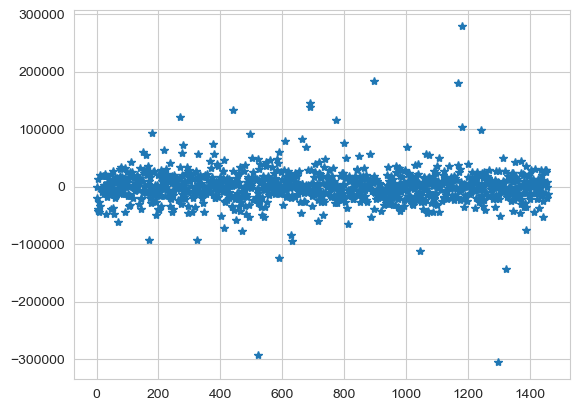

In [53]:
plt.plot(err_train, '*')

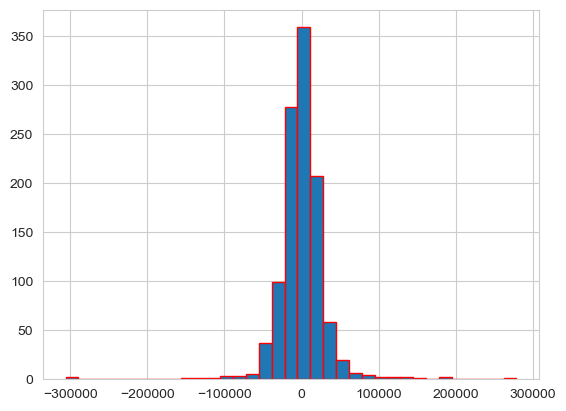

In [54]:
plt.hist(err_train, bins=35, edgecolor='r');

In [55]:
pred_actual_df=pd.DataFrame()


In [56]:
pred_actual_df['Actual']=ppt_train_y
pred_actual_df['Predicted']= pred_train

In [57]:
pred_actual_df

,Actual,Predicted
1242,170000,186814.321258
139,231500,198755.431701
457,256000,235795.569158
938,239799,236785.117576
4,250000,288883.043200
...,...,...
119,163990,183462.847495
185,475000,447337.815960
435,212000,228531.658891
419,142000,132386.608909


In [58]:
import seaborn as sns

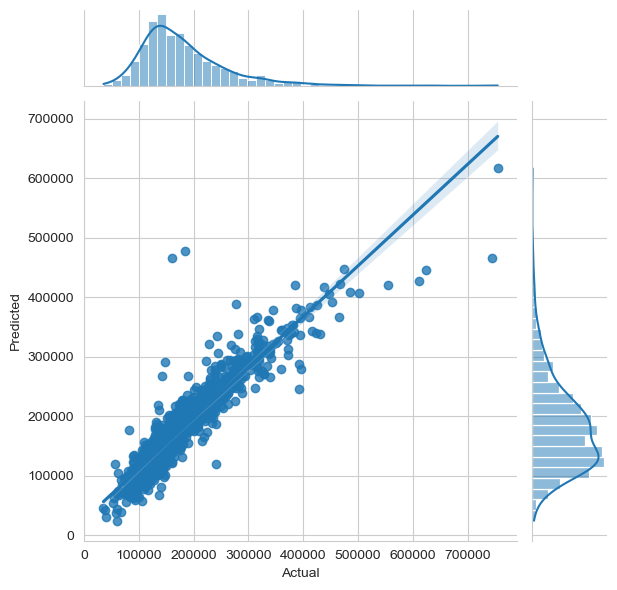

In [59]:
sns.jointplot(x='Actual', y='Predicted', data=pred_actual_df, kind='reg')



We plotted histograms and joint plots to visualize the distribution of the features and their relationship with the target variable. This helps in understanding the data distribution and identifying potential outliers.

To remove this outliers we use remove outlier function 

In [60]:
def remove_outlier(df, col, k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean - k * sd)]
    final_list=[x for x in final_list if (x < mean + k * sd)]
    df1= df.loc[df[col].isin(final_list)]; 
    print(df1.shape)
    print('Numbers of outliers removed----->', df.shape[0]-df1.shape[0])
    

In [61]:
remove_outlier(ppt, 'Sale_Price', 2)

(1396, 75)
Numbers of outliers removed-----> 63


After removing outliers from the data we got predicted data normally distributed 

## Conclusion

Based on these steps, we conclude that our linear regression model is performing well, with a high R-squared value, low RMSE, and normally distributed predicted property prices. 

Linear regression can be a useful tool for exploring relationships between property features and their Sales_Price